<a href="https://colab.research.google.com/github/Ike-G/chessTimePrediction/blob/main/chessTimesModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import re
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving sampleBulletFeatures to sampleBulletFeatures


In [ ]:
tupleRegex = re.compile(r"\((-?\d+),\s(-?\d+),\s(-?\d+),\s(-?\d+),\s(-?\d+),\s(-?\d+),\s(\d+),\s(\d+)\)")
rData = uploaded['sampleBulletFeatures'].decode('utf-8').split('\n')[:-1]
data = np.array([[float(j) for j in tupleRegex.match(i).groups()] for i in rData])
np.random.shuffle(data)

avgs = [np.average(i) for i in data.T]
stds = [np.std(i) for i in data.T]
data = (data - avgs) / stds

m = data.shape[0]
x_train, y_train = data[:(m*7)//10, 1:], data[:(m*7)//10, 1]
x_test, y_test = data[(m*7)//10:(m*9)//10, 1:], data[(m*7)//10:(m*9)//10, 1]
x_cv, y_cv = data[(m*9)//10:, 1:], data[(m*9)//10:, 1]

print(x_train.shape)
print(data[:8])

(19945, 7)
[[-0.92415138  2.54798532 -1.67583958  0.03582428 -1.67882908  0.06086271
   1.60313187  2.4704829 ]
 [-0.92415138  1.35531508 -0.82411035  0.13142616 -1.25530779  0.06086271
   2.13445322  1.62351006]
 [-0.28862305  0.56020159 -0.87734343  0.13142616 -0.40826521  0.19331222
  -0.61779137 -0.49215011]
 [-0.28862305  1.67336048 -1.30320805  0.22702803 -1.41412828 -0.07158679
   0.46256204 -0.09524234]
 [-0.28862305  0.79873563 -0.7176442   0.32262991 -0.56708569  0.06086271
   0.27128636  0.08194863]
 [-0.28862305  1.19629238 -1.03704266  0.13142616 -0.67296601  0.06086271
   0.67863272  0.70566084]
 [ 1.61796194  0.95775833 -0.77087728  0.13142616 -1.41412828 -0.07158679
   0.60778988  0.66313501]
 [-0.28862305 -0.31442325  0.29378426  0.32262991  0.5446577   0.06086271
  -0.44422639 -0.52404448]]


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(16, kernel_initializer='normal', input_shape=(x_train.shape[1],) ,activation='relu'),
                                    tf.keras.layers.Dense(16, kernel_initializer='normal', activation='relu'),
                                    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mean_absolute_error']
)
model.summary()
model.fit(x_train, y_train, epochs=32)
model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                128       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
624/624 [==============================] - 1s 1ms/step - loss: 0.4132 - mean_absolute_error: 0.4226
Epoch 2/32
624/624 [==============================] - 1s 1ms/step - loss: 0.0015 - mean_absolute_error: 0.0274
Epoch 3/32
624/624 [==============================] - 1s 1ms/step - loss: 2.4098e-04 - mean_absolute_error: 0.0104
Epoch 4/32
624/624 [=============================

[1.7030199160217308e-05, 0.003419157350435853]

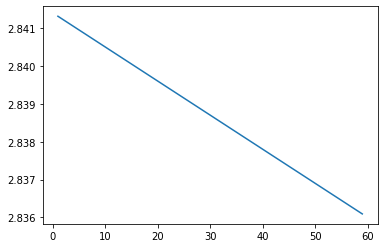

In [ ]:
tData = np.array([((np.array([5, 30, i, 5, 5, 3, 1600, 1600]) - avgs) / stds)[1:] for i in range(1, 60)])
plt.plot([i for i in range(1,60)], model(tData)*stds[0]+avgs[0])
plt.show()

In [ ]:
0.0031*stds[0] +avgs[0]

1.4590244638291305